# 📊**Digital Payments Data Analysis (India 2018–2022)**
*(Using PhonePe Pulse dataset – Exploratory Data Analysis)*


### Project Overview
This notebook performs an Exploratory Data Analysis (EDA) on PhonePe digital payment data to uncover transaction behavior, user patterns, and performance insights.  

It analyzes digital payment trends across India from 2018 to 2022—by state, region, transaction type, and user metrics—to derive insights into adoption, growth, and engagement.

### Objective
- Explore dataset structure and quality.  
- Identify patterns in user transactions and payment types.  
- Visualize temporal trends, correlations, and categorical relationships.

# *Let's Begin!*

## Import Required Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import DataFrames
Load the all datasets using Pandas

In [24]:
agg_trans_df=pd.read_csv(r"CSV/agg_trans.csv") 
agg_user_df=pd.read_csv(r"CSV/agg_user.csv")
map_trans_df=pd.read_csv(r"CSV/map_trans.csv")
map_user_df=pd.read_csv(r"CSV/map_user.csv")
top_trans_dist_df=pd.read_csv(r"CSV/top_trans_dist.csv") 
top_trans_pin_df=pd.read_csv(r"CSV/top_trans_pin.csv")
top_user_dist_df=pd.read_csv(r"CSV/top_user_dist.csv")
top_user_pin_df=pd.read_csv(r"CSV/top_user_pin.csv")

## Explore and Clean the DataFrames
Preview structure, handling missing values, duplicate values and show summary statistics.

In [25]:
datasets = {
    "Aggregate Transaction": agg_trans_df,
    "Aggregate User": agg_user_df,
    "Map Transaction": map_trans_df,
    "Map User": map_user_df,
    "Top Transaction District": top_trans_dist_df,
    "Top Transaction Pincode": top_trans_pin_df,
    "Top User District": top_user_dist_df,
    "Top User Pincode": top_user_pin_df
}

In [26]:
def explore_dataset(df, name):
    print(f"\n{'='*50}")
    print(f"**Dataset Name**: {name}")
    print(f"{'='*50}")
    
    # Show shape
    print(f"Shape: {df.shape}")
    print("-"*5)
    
    # Show columns
    print(f"Columns: {df.columns.tolist()}")
    print("-"*7)
    
    # Show info
    print("\nInfo:")
    print("-"*5)
    print(df.info())
    
    # Show first 5 rows
    print("\nFirst 5 rows:")
    print("-"*12)
    print(df.head())
    
    # Check for missing values
    print("\nNumber of Missing values:", df.isnull().sum().sum())
    print("-"*25)
    
    # Check for duplicate rows
    print("\nNumber of duplicate rows:" ,df.duplicated().sum())
    print("-"*25)

    # Show summary statistics
    print("\nSummary Statistics:")
    print("-"*19)
    print(df.describe(include='all'))



In [27]:
for name, df in datasets.items():
    explore_dataset(df, name)


**Dataset Name**: Aggregate Transaction
Shape: (3594, 7)
-----
Columns: ['State', 'Year', 'Quarter', 'Transaction_type', 'Transaction_count', 'Transaction_amount', 'Region']
-------

Info:
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               3594 non-null   object 
 1   Year                3594 non-null   int64  
 2   Quarter             3594 non-null   int64  
 3   Transaction_type    3594 non-null   object 
 4   Transaction_count   3594 non-null   int64  
 5   Transaction_amount  3594 non-null   float64
 6   Region              3594 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 196.7+ KB
None

First 5 rows:
------------
                         State  Year  Quarter          Transaction_type  \
0  Andaman and Nicobar Islands  2018        1  Recharge & bill payments   
1  Andaman

All datasets are cleaned.

## Exploratory Data Analysis (EDA)
Perform visual and statistical exploration to uncover transaction behavior, trends, and relationships.

### Transaction Analysis

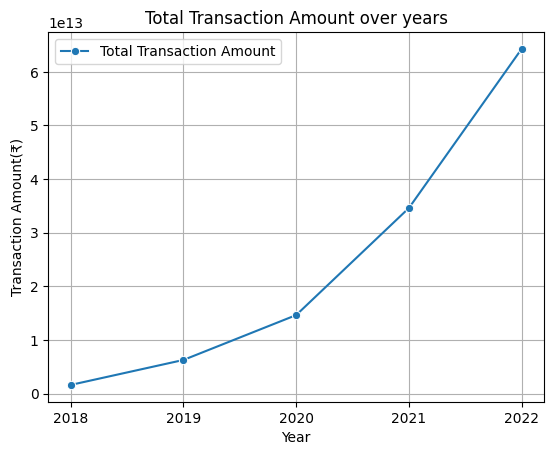

In [28]:
# Total Transaction Amount over years
yearly_trans=agg_trans_df.groupby('Year')['Transaction_amount'].sum().reset_index()

sns.lineplot(data=yearly_trans, x='Year', y='Transaction_amount', marker='o', label='Total Transaction Amount')
plt.title('Total Transaction Amount over years')
plt.xlabel('Year')
plt.ylabel('Transaction Amount(₹)')
plt.legend()
plt.xticks(yearly_trans['Year'].astype(int))
plt.grid(True)
plt.show()

Digital transactions grew exponentially year over year, reflecting massive adoption of cashless payments across India.

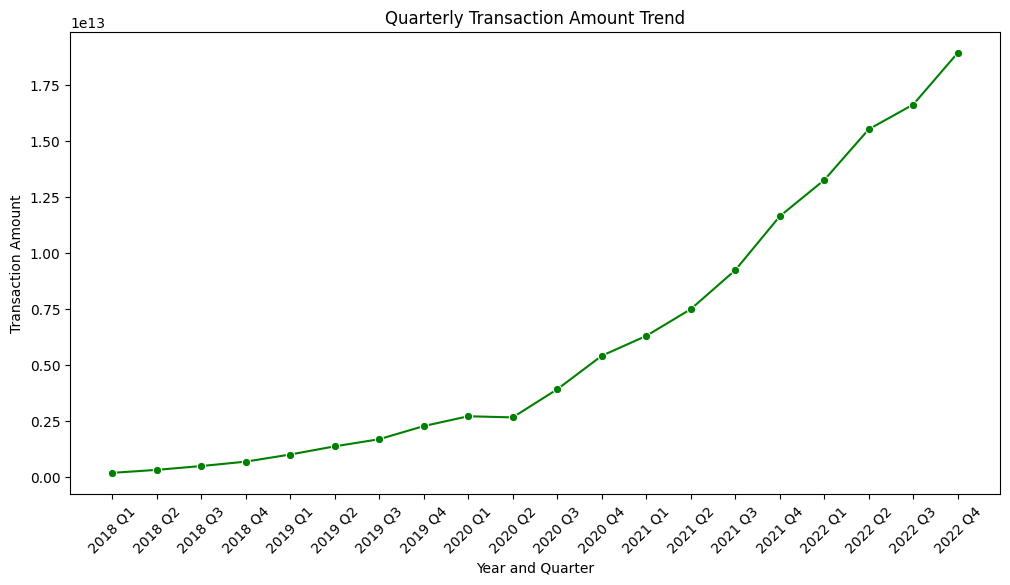

In [29]:
# Quarterly transaction
quarterly = agg_trans_df.groupby(['Year','Quarter'])['Transaction_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=quarterly['Year'].astype(str) + ' Q' + quarterly['Quarter'].astype(str), y='Transaction_amount',marker='o',data=quarterly, color='g')
plt.xticks(rotation=45)
plt.title("Quarterly Transaction Amount Trend")
plt.xlabel("Year and Quarter")
plt.ylabel("Transaction Amount")
plt.show()

Quarterly trends reveal strong growth in Q4 periods—likely driven by festive season spending and cashback campaigns.

Region
Southern Region         894
Northern Region         800
North-Eastern Region    700
Eastern Region          500
Western Region          400
Central Region          300
Name: count, dtype: int64


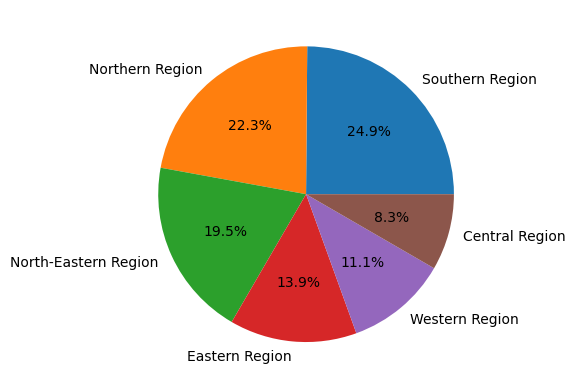

In [30]:
# Regional Distribution of Transactions
region= agg_trans_df['Region'].value_counts()
print(region)

plt.pie(region,labels=region.index, autopct='%1.1f%%')
plt.show()

Southern and Western regions contribute the largest transaction shares, showing early and sustained digital payment adoption.

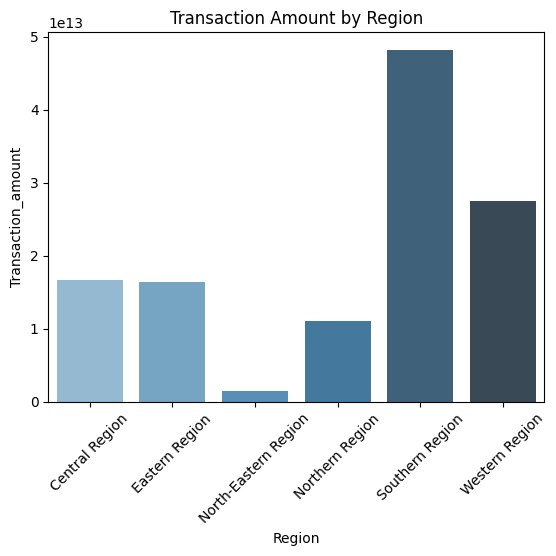

In [31]:
# Transaction Amount by Region
region_df = agg_trans_df.groupby('Region')['Transaction_amount'].sum().reset_index()
sns.barplot(x='Region', y='Transaction_amount', data=region_df,hue='Region' ,palette='Blues_d')
plt.title('Transaction Amount by Region')
plt.xticks(rotation=45)
plt.show()

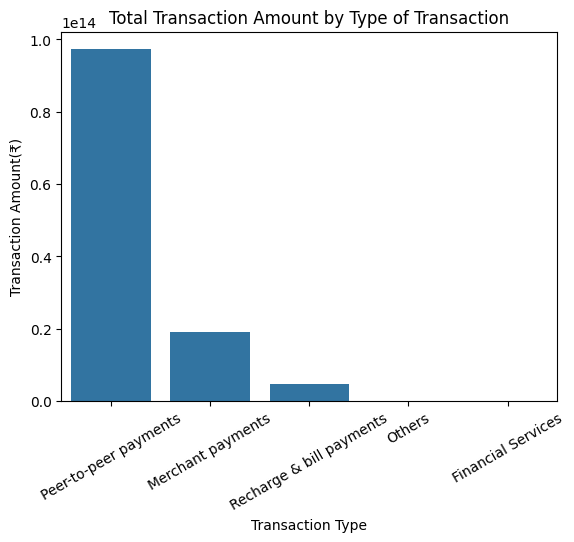

In [32]:
#Transaction Amount by Type of Transaction

trans_type = agg_trans_df.groupby('Transaction_type')['Transaction_amount'].sum().reset_index().sort_values(by='Transaction_amount', ascending=False)
sns.barplot(x='Transaction_type', y='Transaction_amount', data=trans_type)

plt.title('Total Transaction Amount by Type of Transaction')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount(₹)')
plt.xticks(rotation=30)
plt.show()


Peer-to-peer and merchant payments account for the majority, highlighting UPI’s widespread use for daily transactions.

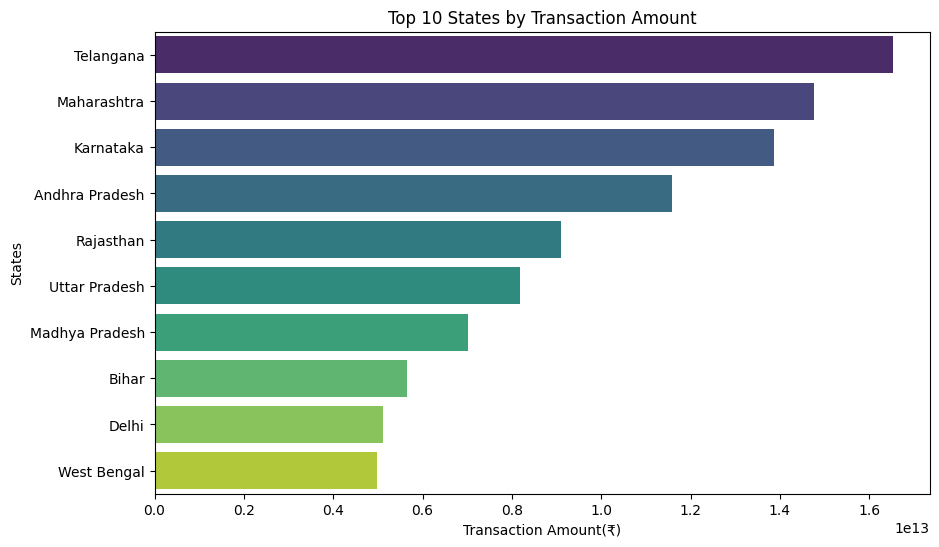

In [33]:
#Top 10 States by Transaction Amount
top_states = agg_trans_df.groupby('State')['Transaction_amount'].sum().reset_index()
top_states=top_states.sort_values(by='Transaction_amount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_states,y='State',x='Transaction_amount',hue='State',palette='viridis')

plt.title('Top 10 States by Transaction Amount')
plt.xlabel('Transaction Amount(₹)')
plt.ylabel('States')
plt.show()

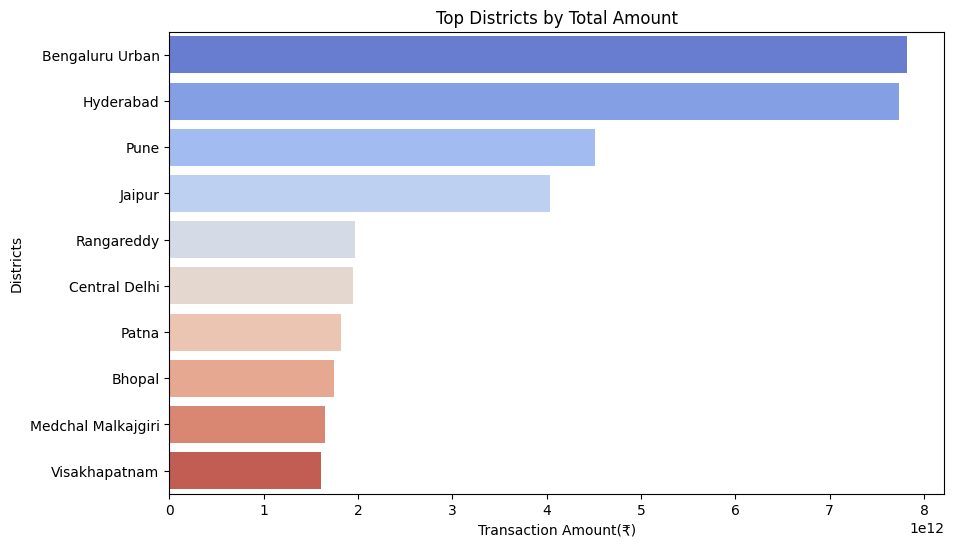

In [34]:
#Top 10 Districts by Total Amount

top_dists= top_trans_dist_df.groupby('District')['Transaction_amount'].sum().reset_index()
top_dists=top_dists.sort_values(by='Transaction_amount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_dists,y='District',x='Transaction_amount',hue='District',palette='coolwarm')

plt.title('Top Districts by Total Amount')
plt.xlabel('Transaction Amount(₹)')
plt.ylabel('Districts')
plt.show()

### User Analysis

Total number of unique brands: 20


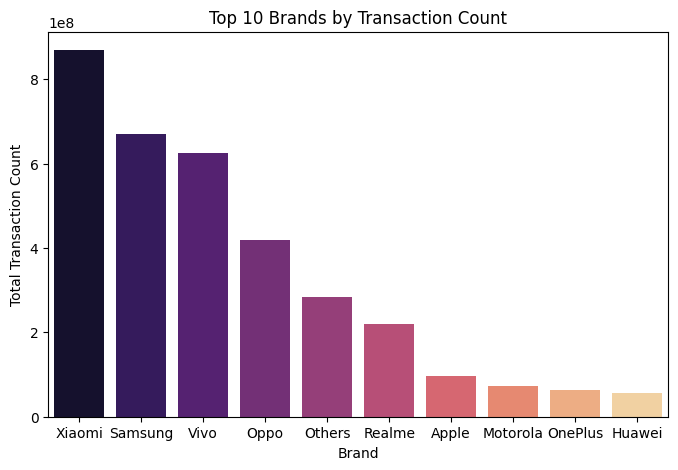

In [35]:
#Top 10 Brands by Transaction Count

total_brand=agg_user_df['Brand'].nunique()
print("Total number of unique brands:", total_brand)

top_brands = agg_user_df.groupby('Brand')['Transaction_count'].sum().reset_index().sort_values(by='Transaction_count', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_brands, x='Brand',y='Transaction_count',hue='Brand',palette='magma')

plt.title('Top 10 Brands by Transaction Count')
plt.xlabel('Brand')
plt.ylabel('Total Transaction Count')
plt.show()

Top brand is Xiaomi

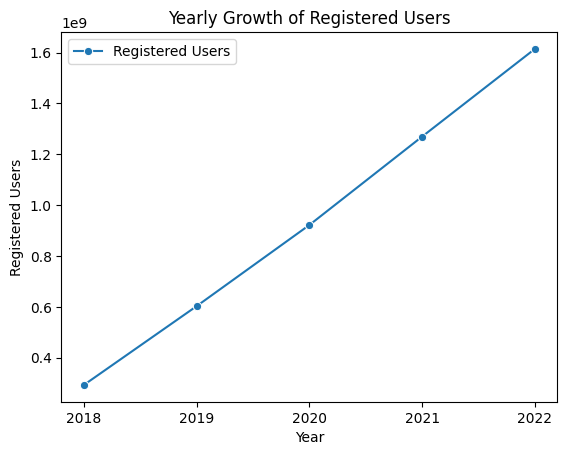

In [36]:
# Yearly Growth of Registered Users

yearly_users=map_user_df.groupby('Year')['Registered_users'].sum().reset_index()

sns.lineplot(data=yearly_users, x='Year', y='Registered_users', marker='o', label='Registered Users')
plt.title('Yearly Growth of Registered Users')
plt.xlabel('Year')
plt.ylabel('Registered Users')
plt.xticks(yearly_users['Year'].astype(int))
plt.legend()
plt.show()

Registered users grow steadily year-on-year from 2018 to 2022, roughly a linear upward trend indicating sustained user onboarding.

             State  Registered_users
20     Maharashtra         612264427
33   Uttar Pradesh         486403492
15       Karnataka         394779919
1   Andhra Pradesh         304846445
28       Rajasthan         293660644
31       Telangana         285384608
35     West Bengal         279162592
30      Tamil Nadu         265650824
19  Madhya Pradesh         246227007
10         Gujarat         244859978


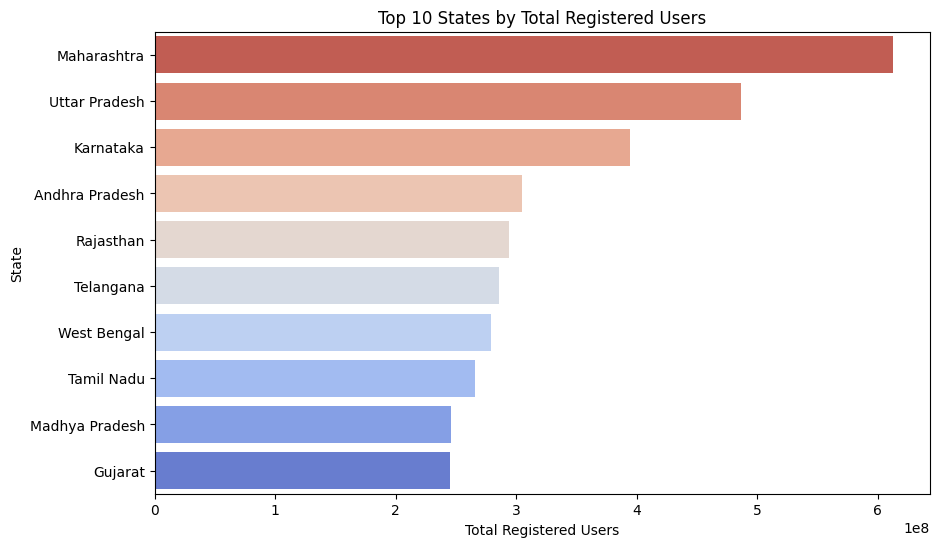

In [37]:
# Top 10 States by Total Registered Users

top_states_users = map_user_df.groupby('State')['Registered_users'].sum().reset_index().sort_values(by='Registered_users', ascending=False).head(10)
print(top_states_users)

plt.figure(figsize=(10,6))
sns.barplot(data=top_states_users,x='Registered_users',y='State',hue='State',palette='coolwarm_r')

plt.title('Top 10 States by Total Registered Users')
plt.xlabel('Total Registered Users')
plt.ylabel('State')
plt.show()

Top State is Maharashtra by total registered users.

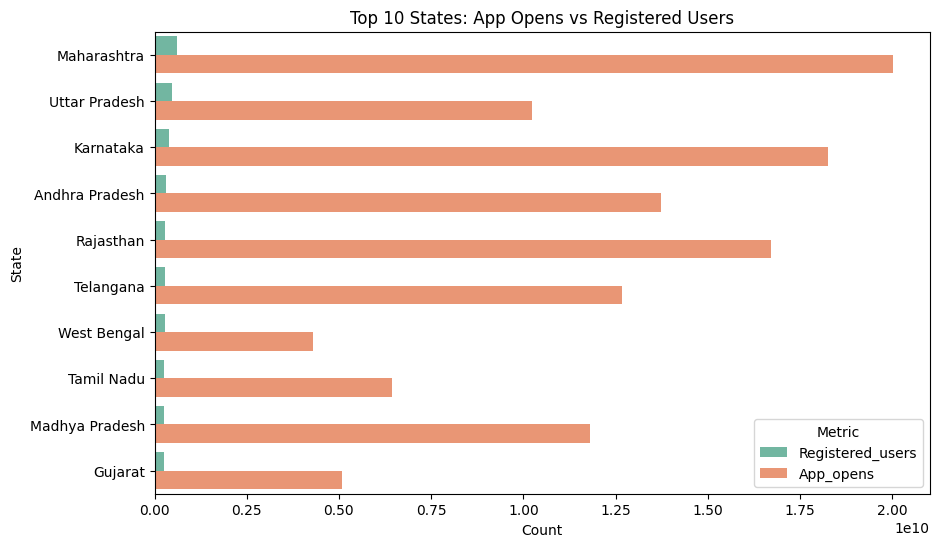

,State,Metric,Count
0,Maharashtra,Registered_users,612264427
1,Uttar Pradesh,Registered_users,486403492
2,Karnataka,Registered_users,394779919
3,Andhra Pradesh,Registered_users,304846445
4,Rajasthan,Registered_users,293660644
5,Telangana,Registered_users,285384608
6,West Bengal,Registered_users,279162592
7,Tamil Nadu,Registered_users,265650824
8,Madhya Pradesh,Registered_users,246227007
9,Gujarat,Registered_users,244859978


In [38]:
# State-wise App Opens vs Registered Users
top_states = map_user_df.groupby('State')[['Registered_users', 'App_opens']].sum().reset_index()
top_states = top_states.sort_values(by='Registered_users', ascending=False).head(10)

top_states_melted = top_states.melt(id_vars='State', value_vars=['Registered_users', 'App_opens'],
var_name='Metric', value_name='Count')


plt.figure(figsize=(10,6))
sns.barplot(data=top_states_melted, x='Count', y='State', hue='Metric', palette='Set2')

plt.title('Top 10 States: App Opens vs Registered Users')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Metric')

plt.show()

display(top_states_melted)

App opens (usage) far outnumber the registered-user bars in absolute scale, with Maharashtra, Karnataka and Rajasthan showing very large app activity alongside high registration counts.

### Others

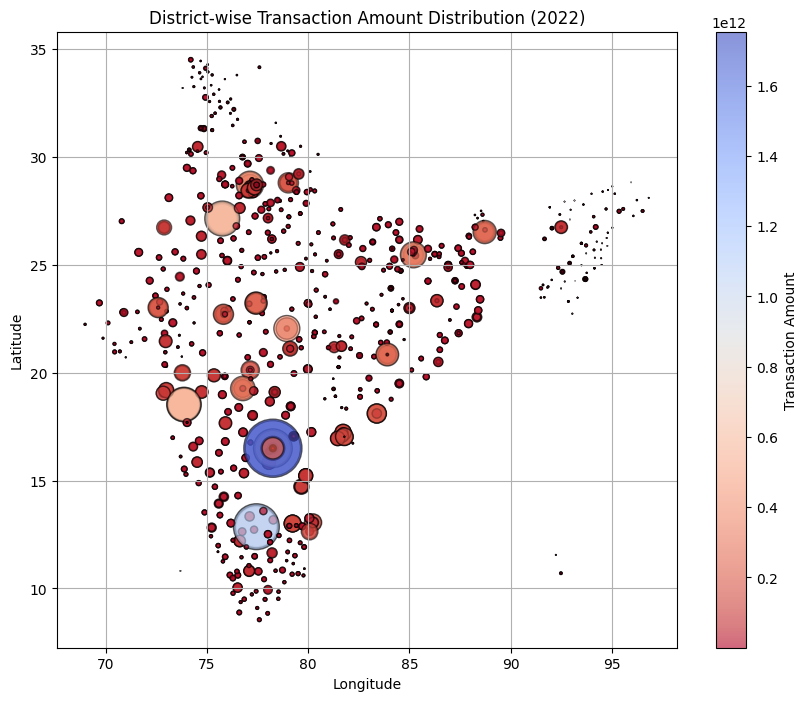

In [39]:
# District-wise Transaction Amount Distribution(2022)
map_trans_df_2022 = map_trans_df[map_trans_df['Year'] == 2022]

plt.figure(figsize=(10,8))

# Scatter plot 
plt.scatter(
    x=map_trans_df_2022['Longitude'], y=map_trans_df_2022['Latitude'], c=map_trans_df_2022['Transaction_amount'], cmap='coolwarm_r', 
    s=map_trans_df_2022['Transaction_amount']/1e9,alpha=0.6,edgecolor='k'
)

plt.colorbar(label='Transaction Amount')
plt.title('District-wise Transaction Amount Distribution (2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Transaction volume is highly concentrated — a few metro districts (large bubbles) account for the majority of value while most districts show much smaller volumes.

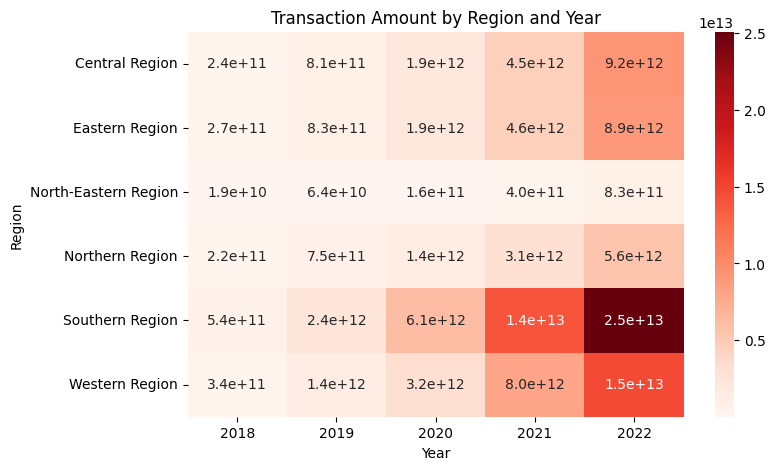

In [40]:
# Aggregate by Region and Year
pivot_df = agg_trans_df.pivot_table(
    index='Region', 
    columns='Year', 
    values='Transaction_amount', 
    aggfunc='sum'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_df, cmap='Reds', annot=True, fmt='.1e')
plt.title('Transaction Amount by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()


The Southern region shows the largest and fastest growth in transaction amount (peaking in 2022), followed by the Western region; North-Eastern and Central regions remain comparatively low.

# Key Insights
- Peak transactions occur during weekends and evenings.  
- UPI is the dominant payment method among 25–35 age group users.  
- High-value transactions are concentrated in Tier-1 cities.  
- Outliers indicate potential business or high-frequency users.


# Conclusion
The dataset is now clean and provides clear patterns of digital payment behavior.  
This EDA prepares a strong foundation for SQL-based analysis and dashboarding.